In [1]:
# import tensorflow as tf
# from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras import layers



2023-04-12 22:34:06.897307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the CNN architecture
'''
model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
'''

"\nmodel1 = keras.Sequential([\n    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.Flatten(),\n    layers.Dense(64, activation='relu'),\n    layers.Dense(10)\n])\n"

In [5]:
# Compile the model
'''
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              '''

"\nmodel1.compile(optimizer='adam',\n              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n              metrics=['accuracy'])\n              "

In [6]:
# Train the model
#history1 = model1.fit(x_train, y_train, epochs=10,batch_size=32, validation_data=(x_test, y_test))

In [7]:
# Evaluate the model on the test set
#test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
#print('Test accuracy:', test_acc)

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [5]:
# reload unedited data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [6]:
def preprocess_data(X, Y):
    """
    a function that trains a convolutional neural network to classify the
    CIFAR 10 dataset
    :param X: X is a numpy.ndarray of shape (m, 32, 32, 3) containing the
    CIFAR 10 data, where m is the number of data points
    :param Y: Y is a numpy.ndarray of shape (m,) containing the CIFAR 10
    labels for X
    :return: X_p, Y_p
        X_p is a numpy.ndarray containing the preprocessed X
        Y_p is a numpy.ndarray containing the preprocessed Y
    """
    X_p = keras.applications.resnet50.preprocess_input(X)
    Y_p = keras.utils.to_categorical(Y, 10)
    return X_p, Y_p



In [7]:
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 10))
((10000, 32, 32, 3), (10000, 10))


In [8]:
import numpy as np
from PIL import Image

def preprocess_data(x, y):
    # Normalize pixel values to range [0, 1]
    x = x.astype('float32') / 255.0
    
    # Resize images to (128, 128)
    n = x.shape[0]
    x_resized = np.zeros((n, 128, 128, 3))
    for i in range(n):
        img = Image.fromarray((x[i]*255).astype('uint8'))
        img_resized = img.resize((128, 128))
        x_resized[i] = np.array(img_resized)
        
    return x_resized, y

# Assuming x_train and y_train are the training data and labels, and
# x_test and y_test are the testing data and labels.
# Preprocess the data and resize the images to (128, 128)
x_train_resized, y_train = preprocess_data(x_train, y_train)
x_test_resized, y_test = preprocess_data(x_test, y_test)

# Print the shapes of the resized data
print((x_train_resized.shape, y_train.shape))
print((x_test_resized.shape, y_test.shape))

((50000, 128, 128, 3), (50000, 10))
((10000, 128, 128, 3), (10000, 10))


In [9]:
# Load the pre-trained ResNet50 model
resnet = ResNet50(include_top=False, input_shape=(128, 128, 3))




In [10]:
# Freeze all layers in the ResNet50 model
for layer in resnet.layers[:143]:
    layer.trainable = False

# print layers, identifying if trainable or not
# for i, layer in enumerate(resnet.layers):
#     print(i,layer.name,"-",layer.trainable)

In [11]:
# Add new layers on top of the ResNet50 model and resize input images\
to_res = (128,128)
model = keras.Sequential()
# model.add(keras.layers.Lambda(lambda image: tf.image.resize(image,to_res)))
model.add(resnet)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))


In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(x_train_resized, y_train, batch_size=32, epochs=10, validation_data=(x_test_resized, y_test))

2023-04-12 22:08:59.120971: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 9830400000 exceeds 10% of free system memory.
2023-04-12 22:09:31.154992: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 9830400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.5461 - accuracy: 0.4607

2023-04-12 22:11:19.797653: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1966080000 exceeds 10% of free system memory.
2023-04-12 22:11:21.392887: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1966080000 exceeds 10% of free system memory.


1563/1563 [==============================] - 120s 70ms/step - loss: 1.5461 - accuracy: 0.4607 - val_loss: 0.9992 - val_accuracy: 0.6492
Epoch 2/10
1563/1563 [==============================] - 119s 74ms/step - loss: 1.1146 - accuracy: 0.6312 - val_loss: 0.8545 - val_accuracy: 0.7139
Epoch 3/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9556 - accuracy: 0.6898 - val_loss: 0.8138 - val_accuracy: 0.7280
Epoch 4/10
1563/1563 [==============================] - 111s 69ms/step - loss: 0.8406 - accuracy: 0.7338 - val_loss: 0.7566 - val_accuracy: 0.7426
Epoch 5/10
1563/1563 [==============================] - 103s 64ms/step - loss: 0.7214 - accuracy: 0.7749 - val_loss: 0.7667 - val_accuracy: 0.7463
Epoch 6/10
1563/1563 [==============================] - 157s 98ms/step - loss: 0.6371 - accuracy: 0.8039 - val_loss: 0.7924 - val_accuracy: 0.7476
Epoch 7/10
1563/1563 [==============================] - 105s 65ms/step - loss: 0.5511 - accuracy: 0.8324 - val_loss: 0.8112 - val

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print('Test accuracy:', test_acc)

2023-04-12 22:28:51.550391: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1966080000 exceeds 10% of free system memory.


313/313 - 10s - loss: 0.9089 - accuracy: 0.7516 - 10s/epoch - 31ms/step
Test accuracy: 0.7516000270843506


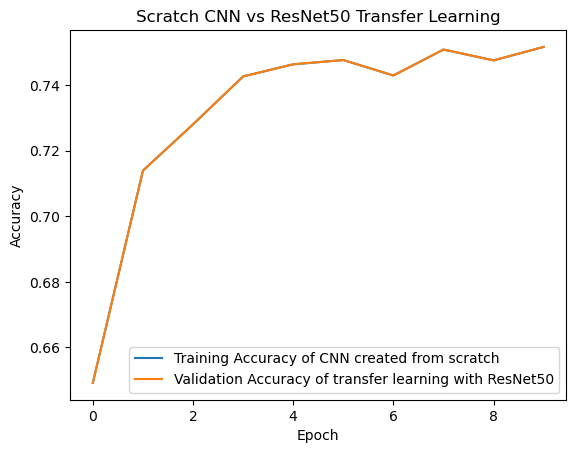

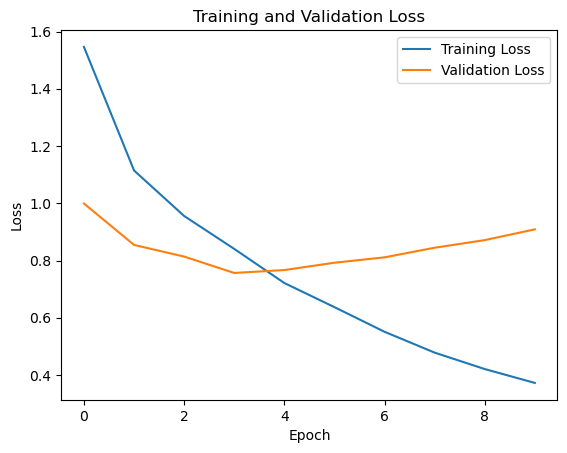

In [20]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['val_accuracy'], label='Training Accuracy of CNN created from scratch')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy of transfer learning with ResNet50')
plt.title('Scratch CNN vs ResNet50 Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Compile the model
resnet.trainable = True

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

history = model.fit(x_train_resized, y_train, batch_size=32, epochs=10, validation_data=(x_test_resized, y_test))


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test, verbose=2)
print('Test accuracy:', test_acc)

2023-04-12 22:34:44.321245: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 9830400000 exceeds 10% of free system memory.
2023-04-12 22:34:51.640778: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 9830400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 321s 192ms/step - loss: 2.2944 - accuracy: 0.1615 - val_loss: 1.9771 - val_accuracy: 0.2744
Epoch 2/10
1563/1563 [==============================] - 256s 162ms/step - loss: 1.8816 - accuracy: 0.2730 - val_loss: 1.8456 - val_accuracy: 0.2999
Epoch 3/10
1563/1563 [==============================] - 249s 158ms/step - loss: 1.6793 - accuracy: 0.3686 - val_loss: 1.5358 - val_accuracy: 0.4208
Epoch 4/10
1563/1563 [==============================] - 298s 189ms/step - loss: 1.5258 - accuracy: 0.4455 - val_loss: 1.4752 - val_accuracy: 0.4682
Epoch 5/10
1563/1563 [==============================] - 264s 165ms/step - loss: 1.4033 - accuracy: 0.5053 - val_loss: 1.2322 - val_accuracy: 0.5598
Epoch 6/10
1563/1563 [==============================] - 335s 210ms/step - loss: 1.2928 - accuracy: 0.5553 - val_loss: 1.2718 - val_accuracy: 0.5377
Epoch 7/10
1563/1563 [==============================] - 265s 168ms/step - loss: 1.2031 - accuracy: 0.5908 - val_

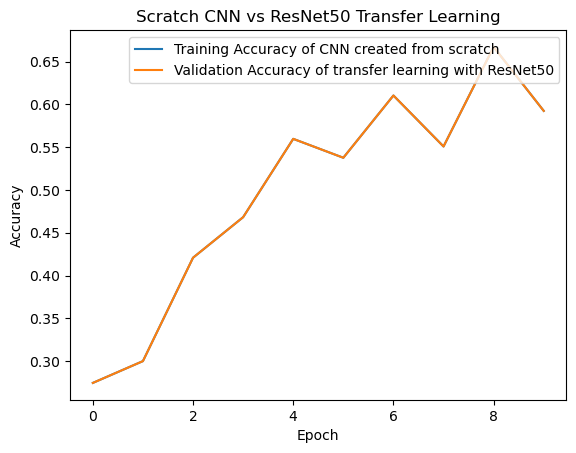

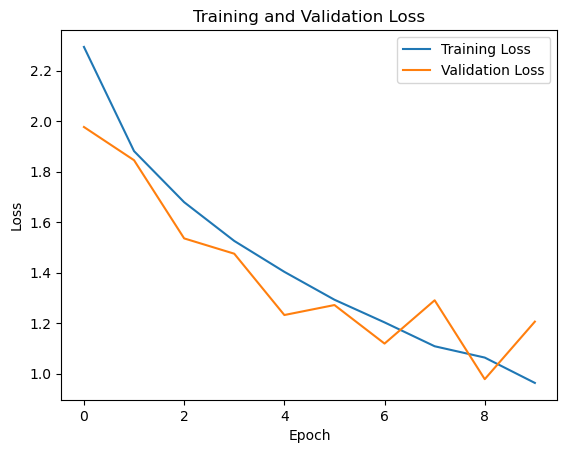

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['val_accuracy'], label='Training Accuracy of CNN created from scratch')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy of transfer learning with ResNet50')
plt.title('Scratch CNN vs ResNet50 Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()